In [27]:
# Limit GPU ram usage for multiple models
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:
        print(e)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.models import model_from_json
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras import layers
from keras import optimizers

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

import cv2
import os

import numpy as np

In [29]:
labels = ['throwaway2', 'hi', 'there,', "I'm", 'Jackie', 'smile']

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                # Read in and set to grayscale
                img_arr = cv2.cvtColor(cv2.imread(os.path.join(path, img)), cv2.COLOR_BGR2GRAY)
                data.append([img_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [30]:
data = get_data('processed-images')

<ipython-input-29-19a0d3ccef25>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


C:\Users\johna\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

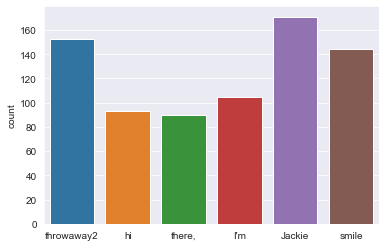

In [31]:
l = []
for i in data:
    if(i[1] == 0):
        l.append(labels[0])
    elif(i[1] == 1):
        l.append(labels[1])
    elif(i[1] == 2):
        l.append(labels[2])
    elif(i[1] == 3):
        l.append(labels[3])
    elif(i[1] == 4):
        l.append(labels[4])
    else:
        l.append(labels[5])
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'Jackie')

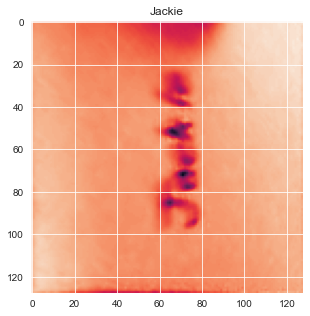

In [32]:
plt.figure(figsize = (5,5))
plt.imshow(data[500][0])
plt.title(labels[data[500][1]])

In [33]:
# Split into a training and validation set
X = []
y = []

for feature, label in data:
  X.append(feature)
  y.append(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [34]:
# Normalize the data
X_train = np.array(X_train) / 255
X_test = np.array(X_test) / 255
X_train = X_train.reshape(X_train.shape[0], 128,128,1)
X_test = X_test.reshape(X_test.shape[0], 128,128,1)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(529, 128, 128, 1)
(529,)
(227, 128, 128, 1)
(227,)


In [35]:
# One-hot encoding
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, len(labels))
y_test = np_utils.to_categorical(y_test, len(labels))
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (529,)
Shape after one-hot encoding:  (529, 6)


In [36]:
from tensorflow.keras.callbacks import LearningRateScheduler

model = Sequential()

model.add(layers.Conv2D(128, (12, 12), activation='relu', strides=(2,2), padding='valid', input_shape=(128, 128, 1)))
model.add(layers.Conv2D(256, (5, 5), activation='relu', strides=(1,2), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(len(labels)))

model.compile(optimizers.Adam(learning_rate=0.0001, beta_1=0.95),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 59, 59, 128)       18560     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 59, 30, 256)       819456    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 15, 256)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 7, 256)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

In [38]:
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/15
9/9 [==============================] - 3s 253ms/step - loss: 1.8112 - accuracy: 0.1706 - val_loss: 1.7599 - val_accuracy: 0.2247
Epoch 2/15
9/9 [==============================] - 1s 96ms/step - loss: 1.7588 - accuracy: 0.2496 - val_loss: 1.7445 - val_accuracy: 0.2819
Epoch 3/15
9/9 [==============================] - 1s 95ms/step - loss: 1.7483 - accuracy: 0.2787 - val_loss: 1.7246 - val_accuracy: 0.3833
Epoch 4/15
9/9 [==============================] - 1s 96ms/step - loss: 1.7225 - accuracy: 0.3521 - val_loss: 1.6845 - val_accuracy: 0.2952
Epoch 5/15
9/9 [==============================] - 1s 97ms/step - loss: 1.6811 - accuracy: 0.3042 - val_loss: 1.6105 - val_accuracy: 0.3833
Epoch 6/15
9/9 [==============================] - 1s 98ms/step - loss: 1.5872 - accuracy: 0.4177 - val_loss: 1.5309 - val_accuracy: 0.4317
Epoch 7/15
7/9 [======================>.......] - ETA: 0s - loss: 1.5126 - accuracy: 0.4475

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print(test_acc)

In [ ]:
def predict(filename):
    testing_img = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2GRAY)
    testing_img = np.array(testing_img) / 255
    testing_img = testing_img.reshape(1,128,128,1)

    prediction = model.predict(testing_img)
    #print(prediction)
    
    i = 0
    max_val_i = 0
    max_val = prediction[0,0]
    for label in prediction[0]:
        if label > max_val:
            max_val_i = i
            max_val = label
        i = i + 1
    
    return labels[max_val_i]

In [ ]:
print(predict('testing1.png') + ' -> M')
print(predict('testing2.png') + ' -> S')
print(predict('testing3.png') + ' -> F')
print(predict('testing4.png') + ' -> throwaway')
print(predict('testing5.png') + ' -> O')

In [16]:
# Serialize successful model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
